<a href="https://colab.research.google.com/github/anisfreelancer71/kapal_titanic/blob/main/Salinan_dari_02_Dataset%2C_Target_Variable%2C_dan_Missing_Values!.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [5]:
data_loan = pd.read_csv("/content/drive/MyDrive/filecsv/lc_2016_2017.csv")

In [6]:
data_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,112435993,NaN,2300,2300,2300,36 months,12.62,77.08,C,C1,...,0.0,NaN,1.0,2.0,2315.0,55.0,7100.0,1.0,0.0,2.0
1,112290210,NaN,16000,16000,16000,60 months,12.62,360.95,C,C1,...,11078.0,69.0,3.0,5.0,1962.0,94.0,31900.0,0.0,6.0,1.0
2,112436985,NaN,6025,6025,6025,36 months,15.05,209.01,C,C4,...,0.0,NaN,1.0,2.0,1950.0,45.0,27700.0,1.0,5.0,3.0
3,112439006,NaN,20400,20400,20400,36 months,9.44,652.91,B,B1,...,53566.0,95.0,1.0,2.0,4240.0,60.0,46900.0,1.0,1.0,1.0
4,112438929,NaN,13000,13000,13000,36 months,11.99,431.73,B,B5,...,8466.0,72.0,0.0,1.0,2996.0,78.0,7800.0,0.0,0.0,0.0


In [7]:
data_loan.shape

(106385, 72)

In [8]:
data_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106385 entries, 0 to 106384
Data columns (total 72 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           106385 non-null  int64  
 1   member_id                    0 non-null       float64
 2   loan_amnt                    106385 non-null  int64  
 3   funded_amnt                  106385 non-null  int64  
 4   funded_amnt_inv              106385 non-null  int64  
 5   term                         106385 non-null  object 
 6   int_rate                     106385 non-null  float64
 7   installment                  106385 non-null  float64
 8   grade                        106385 non-null  object 
 9   sub_grade                    106385 non-null  object 
 10  emp_title                    99533 non-null   object 
 11  emp_length                   99619 non-null   object 
 12  home_ownership               106385 non-null  object 
 13 

In [9]:
data_loan.loan_status.unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

In [10]:
data_loan['good_bad'] = np.where(data_loan.loc[:, 'loan_status'].isin(['Charged off', 'Default', 'Late(16-30 days)']),1,0)

In [11]:
data_loan.good_bad.value_counts()

0    106384
1         1
Name: good_bad, dtype: int64

In [36]:
data_loan[['loan_status' , 'good_bad']]

,loan_status,good_bad
0,Current,0
1,Current,0
2,Current,0
3,Current,0
4,Current,0
...,...,...
106380,Current,0
106381,Fully Paid,0
106382,Current,0
106383,Current,0


In [37]:
missing_values = pd.DataFrame(data_loan.isnull().sum()/data_loan.shape[0])
missing_values

,0
id,0.000000
loan_amnt,0.000000
funded_amnt,0.000000
funded_amnt_inv,0.000000
term,0.000000
...,...
total_cu_tl,0.000009
inq_last_12m,0.000009
good_bad,0.000000
grade_encoded,0.000000


In [38]:
 missing_values = missing_values[missing_values.iloc[:,0]>0.50]

In [39]:
missing_values.sort_values([0],ascending=False)

,0


In [40]:
data_loan.dropna(thresh=data_loan.shape[0] * 0.5, axis=1, inplace=True)

In [41]:
missing_values = pd.DataFrame(data_loan.isnull().sum()/data_loan.shape[0])
missing_values = missing_values[missing_values.iloc[:,0]>0.50]
missing_values.sort_values([0],ascending=False)

,0


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

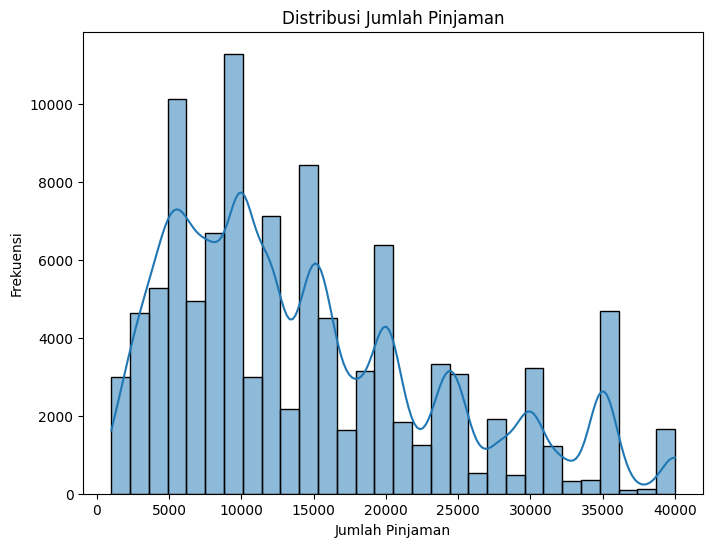

In [19]:
# Contoh 1: Grafik Histogram
plt.figure(figsize=(8, 6))
sns.histplot(data=data_loan, x='loan_amnt', bins=30, kde=True)
plt.title('Distribusi Jumlah Pinjaman')
plt.xlabel('Jumlah Pinjaman')
plt.ylabel('Frekuensi')
plt.show()


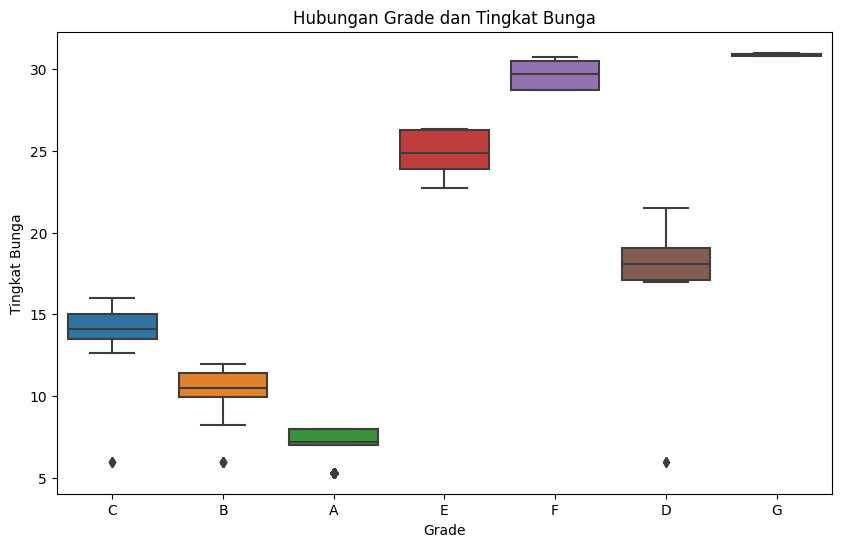

In [43]:
# Contoh 2: Box Plot
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_loan, x='grade', y='int_rate')
plt.title('Hubungan Grade dan Tingkat Bunga')
plt.xlabel('Grade')
plt.ylabel('Tingkat Bunga')
plt.show()

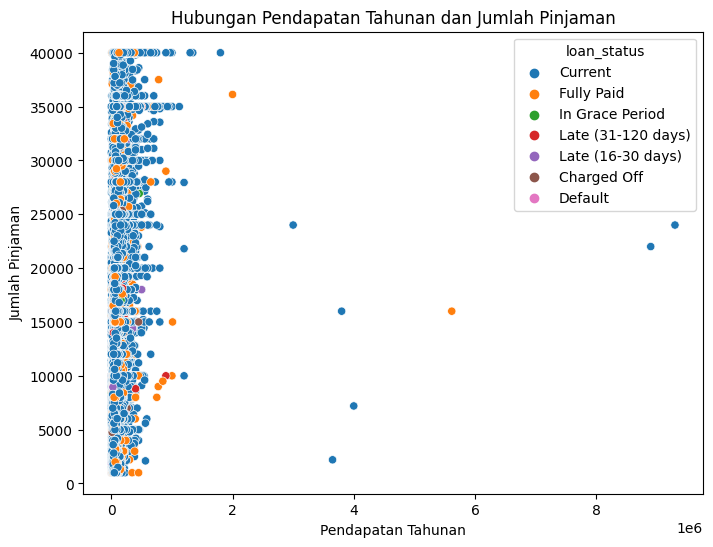

In [44]:
# Contoh 3: Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_loan, x='annual_inc', y='loan_amnt', hue='loan_status')
plt.title('Hubungan Pendapatan Tahunan dan Jumlah Pinjaman')
plt.xlabel('Pendapatan Tahunan')
plt.ylabel('Jumlah Pinjaman')
plt.show()

In [45]:
# Statistik deskriptif
print(data_loan.describe())


                 id      loan_amnt    funded_amnt  funded_amnt_inv  \
count  1.063850e+05  106385.000000  106385.000000    106385.000000   
mean   1.080654e+08   14582.201438   14582.201438     14578.296987   
std    3.151225e+06    9473.491534    9473.491534      9470.777741   
min    6.871190e+05    1000.000000    1000.000000      1000.000000   
25%    1.062463e+08    7000.000000    7000.000000      7000.000000   
50%    1.083115e+08   12000.000000   12000.000000     12000.000000   
75%    1.103213e+08   20000.000000   20000.000000     20000.000000   
max    1.124413e+08   40000.000000   40000.000000     40000.000000   

            int_rate    installment    annual_inc            dti  \
count  106385.000000  106385.000000  1.063850e+05  106309.000000   
mean       13.281214     436.583915  8.053472e+04      18.981235   
std         5.154278     279.998051  7.375672e+04      14.113661   
min         5.320000      30.120000  0.000000e+00       0.000000   
25%         9.930000     232.

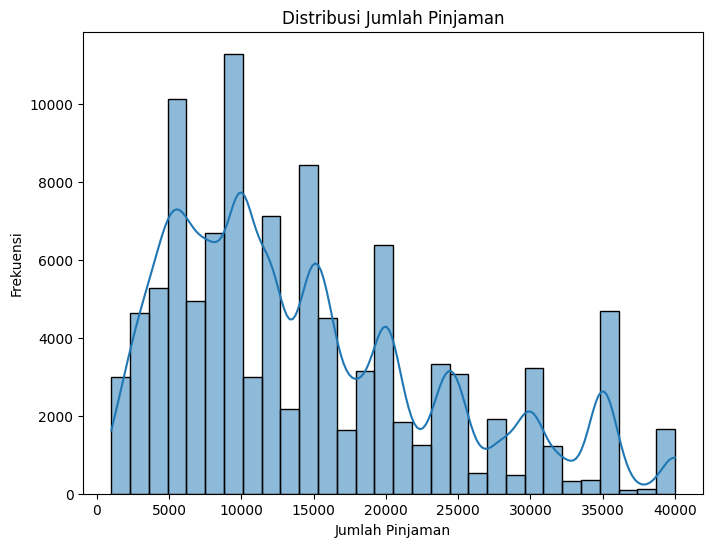

In [46]:
# Distribusi data
plt.figure(figsize=(8, 6))
sns.histplot(data=data_loan, x='loan_amnt', bins=30, kde=True)
plt.title('Distribusi Jumlah Pinjaman')
plt.xlabel('Jumlah Pinjaman')
plt.ylabel('Frekuensi')
plt.show()


<ipython-input-47-85c3638d1cee>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = data_loan.corr()


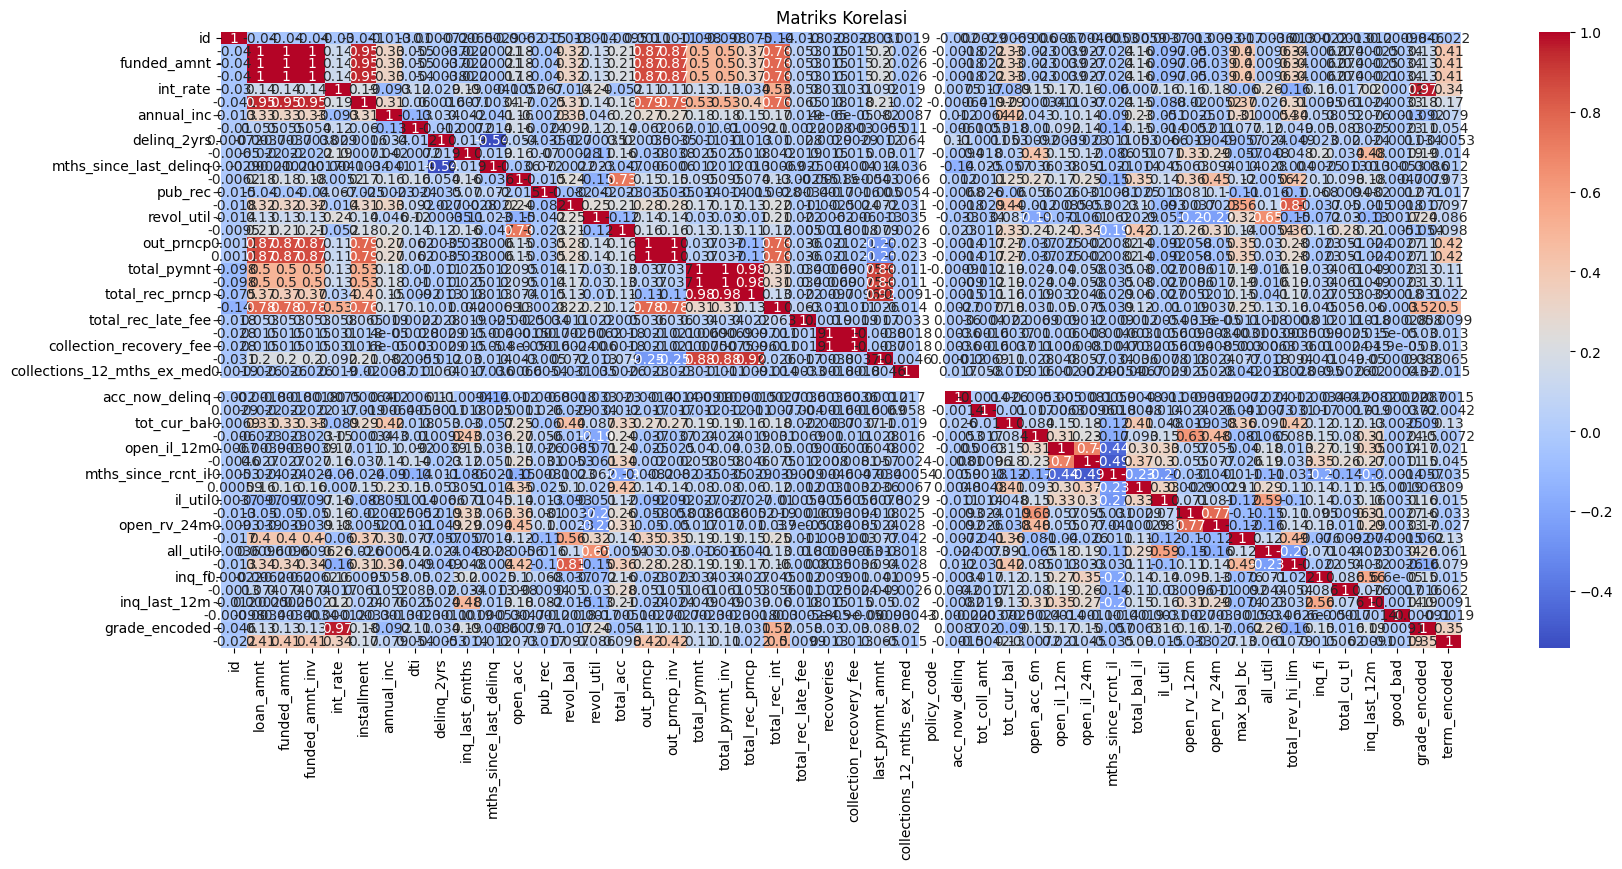

In [47]:
# Korelasi
correlation_matrix = data_loan.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriks Korelasi')
plt.show()

In [27]:
# Analisis Status Pinjaman
status_counts = data_loan['loan_status'].value_counts()
print(status_counts)

Current               92946
Fully Paid             9143
Late (31-120 days)     1907
In Grace Period         927
Charged Off             891
Late (16-30 days)       570
Default                   1
Name: loan_status, dtype: int64


In [28]:
# Analisis Missing Values
missing_data_percentage = (data_loan.isnull().sum() / len(data_loan)) * 100
print(missing_data_percentage)

id                  0.00000
loan_amnt           0.00000
funded_amnt         0.00000
funded_amnt_inv     0.00000
term                0.00000
                     ...   
total_rev_hi_lim    0.00094
inq_fi              0.00094
total_cu_tl         0.00094
inq_last_12m        0.00094
good_bad            0.00000
Length: 66, dtype: float64


In [29]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [30]:
# Encoding data kategori dengan LabelEncoder
label_encoder = LabelEncoder()

In [31]:
# Contoh: Encoding kolom 'grade'
data_loan['grade_encoded'] = label_encoder.fit_transform(data_loan['grade'])


In [32]:
# Contoh: Encoding kolom 'term'
data_loan['term_encoded'] = label_encoder.fit_transform(data_loan['term'])


In [33]:
# Encoding data kategori dengan OneHotEncoder (untuk kolom dengan lebih dari dua kategori)
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

In [51]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Membaca data dari file CSV
data_loan = pd.read_csv("/content/drive/MyDrive/filecsv/lc_2016_2017.csv")

# Encoding data kategori dengan LabelEncoder
label_encoder = LabelEncoder()

# Contoh: Encoding kolom 'grade'
data_loan['grade_encoded'] = label_encoder.fit_transform(data_loan['grade'])

# Contoh: Encoding kolom 'term'
data_loan['term_encoded'] = label_encoder.fit_transform(data_loan['term'])

# Encoding data kategori dengan OneHotEncoder (untuk kolom dengan lebih dari dua kategori)
one_hot_encoder = OneHotEncoder(drop='first', sparse=False)

# Contoh: Encoding kolom 'sub_grade'
sub_grade_encoded = one_hot_encoder.fit_transform(data_loan[['sub_grade']])
sub_grade_columns = one_hot_encoder.get_feature_names_out(['sub_grade'])

# Membuat DataFrame dari hasil encoding
sub_grade_encoded_df = pd.DataFrame(sub_grade_encoded, columns=sub_grade_columns)

# Menggabungkan hasil encoding ke dalam data_loan
data_loan = pd.concat([data_loan, sub_grade_encoded_df], axis=1)

# Menyiapkan variabel independen (fitur) dan variabel target
X = data_loan[['loan_amnt', 'int_rate', 'annual_inc', 'grade_encoded', 'term_encoded'] + list(sub_grade_encoded_df.columns)]
y = data_loan['loan_status']

# Contoh: Menampilkan lima baris teratas dari data yang sudah diencode
print(data_loan.head())


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0  112435993        NaN       2300         2300             2300  36 months   
1  112290210        NaN      16000        16000            16000  60 months   
2  112436985        NaN       6025         6025             6025  36 months   
3  112439006        NaN      20400        20400            20400  36 months   
4  112438929        NaN      13000        13000            13000  36 months   

   int_rate  installment grade sub_grade  ... sub_grade_F1 sub_grade_F2  \
0     12.62        77.08     C        C1  ...          0.0          0.0   
1     12.62       360.95     C        C1  ...          0.0          0.0   
2     15.05       209.01     C        C4  ...          0.0          0.0   
3      9.44       652.91     B        B1  ...          0.0          0.0   
4     11.99       431.73     B        B5  ...          0.0          0.0   

  sub_grade_F3  sub_grade_F4 sub_grade_F5 sub_grade_G1 sub_grade_G2  \
0  

In [52]:
# Encoding variabel dependen 'loan_status' dengan LabelEncoder
label_encoder = LabelEncoder()
data_loan['loan_status_encoded'] = label_encoder.fit_transform(data_loan['loan_status'])

# Menyiapkan variabel independen (fitur) dan variabel dependen (target)
X = data_loan[['loan_amnt', 'int_rate', 'annual_inc', 'grade_encoded', 'term_encoded'] + list(sub_grade_encoded_df.columns)]
y = data_loan['loan_status_encoded']

# Contoh: Menampilkan lima baris teratas dari data dengan variabel dependen yang sudah diencode
print(data_loan.head())

          id  member_id  loan_amnt  funded_amnt  funded_amnt_inv       term  \
0  112435993        NaN       2300         2300             2300  36 months   
1  112290210        NaN      16000        16000            16000  60 months   
2  112436985        NaN       6025         6025             6025  36 months   
3  112439006        NaN      20400        20400            20400  36 months   
4  112438929        NaN      13000        13000            13000  36 months   

   int_rate  installment grade sub_grade  ... sub_grade_F2 sub_grade_F3  \
0     12.62        77.08     C        C1  ...          0.0          0.0   
1     12.62       360.95     C        C1  ...          0.0          0.0   
2     15.05       209.01     C        C4  ...          0.0          0.0   
3      9.44       652.91     B        B1  ...          0.0          0.0   
4     11.99       431.73     B        B5  ...          0.0          0.0   

  sub_grade_F4  sub_grade_F5 sub_grade_G1 sub_grade_G2 sub_grade_G3  \
0  

In [53]:
from sklearn.model_selection import train_test_split

# Memisahkan dataset menjadi training set (80%) dan test set (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan jumlah data pada training set dan test set
print("Jumlah data pada training set:", len(X_train))
print("Jumlah data pada test set:", len(X_test))


Jumlah data pada training set: 94069
Jumlah data pada test set: 23518


In [54]:
from sklearn.preprocessing import StandardScaler

# Inisialisasi StandardScaler
scaler = StandardScaler()

# Melakukan Standardization pada training set
X_train_scaled = scaler.fit_transform(X_train)

# Melakukan Standardization pada test set (gunakan mean dan std deviasi dari training set)
X_test_scaled = scaler.transform(X_test)


In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Inisialisasi model Regresi Logistik
logistic_regression_model = LogisticRegression()

# Latih model pada data training
logistic_regression_model.fit(X_train_scaled, y_train)

# Lakukan prediksi pada data test set
y_pred = logistic_regression_model.predict(X_test_scaled)

# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

# Tampilkan hasil evaluasi
print("Akurasi Model:", accuracy)
print("\nClassification Report:\n", classification_rep)


Akurasi Model: 0.8717578025342291

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00       210
           1       0.87      1.00      0.93     20505
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00      2049
           4       0.00      0.00      0.00       180
           5       0.00      0.00      0.00       121
           6       0.00      0.00      0.00       452

    accuracy                           0.87     23518
   macro avg       0.12      0.14      0.13     23518
weighted avg       0.76      0.87      0.81     23518



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels wit

In [57]:
# Melakukan prediksi pada data test set
y_pred_test = logistic_regression_model.predict(X_test_scaled)

# Menampilkan hasil prediksi
print("Hasil Prediksi pada Data Test Set:")
print(y_pred_test)


Hasil Prediksi pada Data Test Set:
[1 1 1 ... 1 1 1]


#Confusion Matrix:
##Confusion matrix adalah tabel yang digunakan untuk menghitung jumlah prediksi yang benar dan salah dari model. Ini membantu Anda memahami sejauh mana model Anda membedakan antara kelas positif dan negatif.
##Anda dapat menghitung confusion matrix dengan menggunakan library Scikit-Learn sebagai berikut:

In [61]:
from sklearn.metrics import confusion_matrix

# Menghitung confusion matrix
confusion = confusion_matrix(y_test, y_pred_test)
print("Confusion Matrix:")
print(confusion)


Confusion Matrix:
[[    0   210     0     0     0     0     0]
 [    0 20502     0     3     0     0     0]
 [    0     1     0     0     0     0     0]
 [    0  2049     0     0     0     0     0]
 [    0   180     0     0     0     0     0]
 [    0   121     0     0     0     0     0]
 [    0   452     0     0     0     0     0]]


#AUC-ROC Score:

##Area di bawah kurva ROC (AUC-ROC) adalah metrik yang digunakan untuk mengukur kemampuan model dalam memisahkan antara kelas positif dan negatif. Semakin tinggi nilai AUC-ROC, semakin baik model Anda dalam membedakan kelas.
##Anda dapat menghitung AUC-ROC score dengan menggunakan library Scikit-Learn sebagai berikut:

In [81]:
y_test

68594     1
51490     1
108686    1
115327    1
104049    1
         ..
52804     4
40260     6
60831     6
18545     1
69335     1
Name: loan_status_encoded, Length: 23518, dtype: int64

In [82]:
y_pred_test


array([1, 1, 1, ..., 1, 1, 1])

In [88]:
from sklearn.metrics import roc_auc_score

# Inisialisasi list untuk menyimpan skor AUC-ROC untuk setiap kelas
auc_roc_scores = []

# Definisikan jumlah kelas sesuai dengan masalah Anda
num_classes = 3

# Jika Anda memiliki label multikelas, Anda perlu menghitung AUC-ROC score untuk setiap kelas
for class_label in range(num_classes):
    # Membuat array biner untuk kelas tertentu
    y_test_class = (y_test == class_label).astype(int)
    y_pred_test_class = (y_pred_test == class_label).astype(int)

    # Menghitung AUC-ROC score untuk kelas tertentu
    auc_roc = roc_auc_score(y_test_class, y_pred_test_class)
    auc_roc_scores.append(auc_roc)

# Mengambil rata-rata dari skor AUC-ROC untuk semua kelas
average_auc_roc = sum(auc_roc_scores) / len(auc_roc_scores)

print("Average AUC-ROC Score:", average_auc_roc)


Average AUC-ROC Score: 0.4999756157034869


In [89]:
from sklearn.model_selection import GridSearchCV

# Definisikan grid parameter yang akan dijelajahi
param_grid = {'C': [0.1, 1, 10], 'solver': ['lbfgs', 'liblinear']}

# Inisialisasi GridSearchCV
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)

# Melatih model dengan kombinasi hyperparameter terbaik
grid_search.fit(X_train, y_train)

# Mendapatkan model dengan hyperparameter terbaik
best_model = grid_search.best_estimator_


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modu